# Using Data Mining Techniques into Real Estates Industry

**Author**:  _Madalina-Alina Racovita, 1st year master's student on **Computational Optimization at Faculty of Computer Science**, UAIC, Iasi, Romania_

![title](cover.png)

<h1>Task 2 - Association Rule Mining<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-dependencies-&amp;-environment-configuration" data-toc-modified-id="Import-dependencies-&amp;-environment-configuration-1">Import dependencies &amp; environment configuration</a></span></li><li><span><a href="#Load-preprocessed-data-resulted-from-EDA-analysis" data-toc-modified-id="Load-preprocessed-data-resulted-from-EDA-analysis-2">Load preprocessed data resulted from EDA analysis</a></span></li><li><span><a href="#Introduction-to-Association-Rule-Mining-and-Apriori-Algorithm" data-toc-modified-id="Introduction-to-Association-Rule-Mining-and-Apriori-Algorithm-3">Introduction to Association Rule Mining and Apriori Algorithm</a></span></li><li><span><a href="#Dataframe-modification-and-discretization-of-the-continuous-variables" data-toc-modified-id="Dataframe-modification-and-discretization-of-the-continuous-variables-4">Dataframe modification and discretization of the continuous variables</a></span><ul class="toc-item"><li><span><a href="#Remove-unnecessary-columns" data-toc-modified-id="Remove-unnecessary-columns-4.1">Remove unnecessary columns</a></span></li></ul></li><li><span><a href="#Dataframe-encoding" data-toc-modified-id="Dataframe-encoding-5">Dataframe encoding</a></span></li><li><span><a href="#Apriori-Algorithm" data-toc-modified-id="Apriori-Algorithm-6">Apriori Algorithm</a></span></li><li><span><a href="#Support-/-Confidence-/-Lift-distributions-among-rules" data-toc-modified-id="Support-/-Confidence-/-Lift-distributions-among-rules-7">Support / Confidence / Lift distributions among rules</a></span></li><li><span><a href="#Filtering-association-rules-by-metrics-threshholds" data-toc-modified-id="Filtering-association-rules-by-metrics-threshholds-8">Filtering association rules by metrics threshholds</a></span></li><li><span><a href="#Extracting-useful-association-rules-for-a-future-prediction-of-the-target-features" data-toc-modified-id="Extracting-useful-association-rules-for-a-future-prediction-of-the-target-features-9">Extracting useful association rules for a future prediction of the target features</a></span></li><li><span><a href="#Overview-on-the-entire-set-of-association-rules" data-toc-modified-id="Overview-on-the-entire-set-of-association-rules-10">Overview on the entire set of association rules</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-11">Conclusions</a></span></li></ul></div>

## Import dependencies & environment configuration

In [43]:
!pip install mlxtend
!pip install apyori
!pip install networkx

In [2]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

## Load preprocessed data resulted from EDA analysis

In [3]:
df = pd.read_csv('./processed_df.csv', sep=',')
del df['Unnamed: 0']
df.head()

,CountyFipsCode,BuildingCode,StructureNbr,LandSqft,LivingSqft,GarageSqft,BasementSqft,BasementFinishedSqft,Bedrooms,TotalBaths,FirePlaces,YearBuilt,Condition,ConditionCode,Quality,QualityCode,GarageCarportCode,HasPatioPorch,PatioPorchCode,HasPool,PoolCode,Zonning,LandValue,ImprovementValue,TotalValue,AssessedYear,PropTaxAmount,State,Zip,Latitude,Longitude,ConstructionCode,Stories,UnitsInBuilding,FoundationCode,ExteriorCode,CoolingCode,HeatingCode,HeatingSourceCode,IsWaterfront,View,ViewScore,LastSaleDate,LastSalePrice,DocType,TransType,ArmsLengthFlag,DistressCode,StatusDate,SellPrice,OwnerOccupied,DistrsdProp,isRCON,SellDate_Year,SellDate_Month,SellDate_Day,SellPricePerLivingSqft
0,12011,0.0,1,3999,1180,0,0,0,2,2.0,0,1977,AVE,2,QAV,6,NaN,0,0.0,0,NaN,NaN,6059,54499,60560,2016,1616.0,FL,33321,26.206,-80.265,1,0,1,0.0,0.0,0.0,NaN,0.0,0,0.0,0,1998-03-27,40000.0,NaN,R,1,NaN,2017-02-10,40000.0,0,0,1,1998,3,27,33.898305
1,12011,0.0,1,3999,800,0,0,0,1,1.5,0,1973,AVE,2,QAV,6,NaN,0,0.0,0,NaN,NaN,5079,45759,50840,2016,1560.0,FL,33319,26.171,-80.231,1,0,1,0.0,0.0,0.0,NaN,0.0,0,0.0,0,2006-10-06,100000.0,W,R,1,NaN,2017-02-10,100000.0,0,0,1,2006,10,6,125.000000
2,12011,0.0,1,3999,825,0,0,0,2,1.0,0,1968,AVE,2,QAV,6,NaN,0,0.0,0,NaN,RM-18,7439,66979,74420,2016,420.0,FL,33020,26.018,-80.155,1,0,1,0.0,0.0,0.0,NaN,0.0,0,0.0,0,2003-12-05,78000.0,G,R,1,NaN,2017-02-10,78000.0,1,0,1,2003,12,5,94.545455
3,12011,0.0,1,3999,750,0,0,0,1,1.5,0,1989,AVE,2,QAV,6,NaN,0,0.0,0,NaN,NaN,4929,44329,49260,2016,1300.0,FL,33063,26.263,-80.232,1,0,1,0.0,0.0,0.0,NaN,0.0,0,0.0,0,2006-11-28,111500.0,W,R,1,NaN,2017-02-10,111500.0,1,0,1,2006,11,28,148.666667
4,12011,0.0,1,3999,1250,0,0,0,2,2.0,0,1988,AVE,2,QAV,6,NaN,0,0.0,0,NaN,R-4C,13959,125669,139630,2016,880.0,FL,33442,26.297,-80.158,1,0,1,0.0,0.0,0.0,NaN,0.0,0,0.0,0,2009-03-04,85500.0,G,R,1,S,2017-02-10,85500.0,1,3,1,2009,3,4,68.400000


In [4]:
df = df.fillna('')

## Introduction to Association Rule Mining and Apriori Algorithm

**Association Rule Mining** is a process that uses Machine learning **to analyze the data for the patterns**, **the co-occurrence and the relationship between different attributes or items** of the data set. There are many algorithms that use association rules like AIS, SETM, Apriori, etc. **Apriori algorithm** is the most widely used.

There are **3 main components** of an **Apriori Algorithm** which are as follows:

-  **Support** – It is the measure of the popularity of an itemset that is in how many transactions an item appears from the total number of transactions: 

$ Support(X) =  \frac{Number\ of\ transaction\ in\ which\ X\ appears}{Total\ number\ of\ transactions} $
-  **Confidence** – The likelihood of X being associated with Y. \

$ Confidence(X \rightarrow Y) = \frac{Transactions\ containing\ both\ X\ and\ Y}{Transactions\ containing\ X}$


A major drawback of the confidence is that it only considers the popularity of item X and not of Y. This can decrease the confidence value and therefore can be misleading in understanding the association between different items. To overcome this drawback we have another measure known as **Lift**.
-  **Lift** -  Lift will calculate the confidence taking into account the popularity of both items. \

$ Lift(X \rightarrow Y) = \frac{Confidence(X \rightarrow Y)}{Support(B)} $

## Dataframe modification and discretization of the continuous variables

I am going to modify the dataframe so that when it will be transformed into a list of tranzations the meaning of the features will be encapsulated into the values, so that the association rules will be easy to be identified.

In [5]:
print(list(df))

['CountyFipsCode', 'BuildingCode', 'StructureNbr', 'LandSqft', 'LivingSqft', 'GarageSqft', 'BasementSqft', 'BasementFinishedSqft', 'Bedrooms', 'TotalBaths', 'FirePlaces', 'YearBuilt', 'Condition', 'ConditionCode', 'Quality', 'QualityCode', 'GarageCarportCode', 'HasPatioPorch', 'PatioPorchCode', 'HasPool', 'PoolCode', 'Zonning', 'LandValue', 'ImprovementValue', 'TotalValue', 'AssessedYear', 'PropTaxAmount', 'State', 'Zip', 'Latitude', 'Longitude', 'ConstructionCode', 'Stories', 'UnitsInBuilding', 'FoundationCode', 'ExteriorCode', 'CoolingCode', 'HeatingCode', 'HeatingSourceCode', 'IsWaterfront', 'View', 'ViewScore', 'LastSaleDate', 'LastSalePrice', 'DocType', 'TransType', 'ArmsLengthFlag', 'DistressCode', 'StatusDate', 'SellPrice', 'OwnerOccupied', 'DistrsdProp', 'isRCON', 'SellDate_Year', 'SellDate_Month', 'SellDate_Day', 'SellPricePerLivingSqft']


In [6]:
features_grouped_dict = {
    'code_related': ['CountyFipsCode',
                     'BuildingCode',
                     'ConditionCode',
                     'QualityCode',
                     'GarageCarportCode',
                     'PatioPorchCode',
                     'PoolCode',
                     'ConstructionCode',
                     'FoundationCode',
                     'ExteriorCode',
                     'CoolingCode',
                     'HeatingCode',
                     'HeatingSourceCode',
                     'DistressCode',
                     'Condition'],
    'dimension_related': ['LandSqft',
                          'LivingSqft',
                          'GarageSqft', 
                          'BasementSqft', 
                          'BasementFinishedSqft'],
    'number_of': ['Bedrooms', 
                  'TotalBaths'
                 ],
    'bool_type': ['HasPatioPorch', 
                  'HasPool', 
                  'IsWaterfront', 
                  'OwnerOccupied'],
    'quality_related': ['Quality',
                        'View'],
    'location_related': ['Zip',
                         'Latitude',
                         'Longitude',
                         'State',
                         'Zonning'],
    'time_related': ['YearBuilt',
                     'AssessedYear',
                     'SellDate_Year',
                     'SellDate_Month',
                     'SellDate_Day'],
    'type_related': ['DocType', 
                     'TransType'],
    'price_related_regression': ['SellPrice',
                                 'LastSalePrice',
                                 'LandValue', 
                                 'ImprovementValue', 
                                 'TotalValue',
                                 'PropTaxAmount'],
    'classification_related': ['isRCON']
}

In [7]:
keys = ['classification_related', 'quality_related', 'bool_type']
for key in keys:
    for column_name in features_grouped_dict[key]:
        df[column_name] = df[column_name].apply(lambda value: str(value))

In [8]:
for key in features_grouped_dict['code_related']:
    del df[key]

In [9]:
df.head()

,StructureNbr,LandSqft,LivingSqft,GarageSqft,BasementSqft,BasementFinishedSqft,Bedrooms,TotalBaths,FirePlaces,YearBuilt,Quality,HasPatioPorch,HasPool,Zonning,LandValue,ImprovementValue,TotalValue,AssessedYear,PropTaxAmount,State,Zip,Latitude,Longitude,Stories,UnitsInBuilding,IsWaterfront,View,ViewScore,LastSaleDate,LastSalePrice,DocType,TransType,ArmsLengthFlag,StatusDate,SellPrice,OwnerOccupied,DistrsdProp,isRCON,SellDate_Year,SellDate_Month,SellDate_Day,SellPricePerLivingSqft
0,1,3999,1180,0,0,0,2,2.0,0,1977,QAV,0,0,,6059,54499,60560,2016,1616.0,FL,33321,26.206,-80.265,0,1,0,0.0,0,1998-03-27,40000.0,,R,1,2017-02-10,40000.0,0,0,1,1998,3,27,33.898305
1,1,3999,800,0,0,0,1,1.5,0,1973,QAV,0,0,,5079,45759,50840,2016,1560.0,FL,33319,26.171,-80.231,0,1,0,0.0,0,2006-10-06,100000.0,W,R,1,2017-02-10,100000.0,0,0,1,2006,10,6,125.000000
2,1,3999,825,0,0,0,2,1.0,0,1968,QAV,0,0,RM-18,7439,66979,74420,2016,420.0,FL,33020,26.018,-80.155,0,1,0,0.0,0,2003-12-05,78000.0,G,R,1,2017-02-10,78000.0,1,0,1,2003,12,5,94.545455
3,1,3999,750,0,0,0,1,1.5,0,1989,QAV,0,0,,4929,44329,49260,2016,1300.0,FL,33063,26.263,-80.232,0,1,0,0.0,0,2006-11-28,111500.0,W,R,1,2017-02-10,111500.0,1,0,1,2006,11,28,148.666667
4,1,3999,1250,0,0,0,2,2.0,0,1988,QAV,0,0,R-4C,13959,125669,139630,2016,880.0,FL,33442,26.297,-80.158,0,1,0,0.0,0,2009-03-04,85500.0,G,R,1,2017-02-10,85500.0,1,3,1,2009,3,4,68.400000


In [10]:
features_without_discretization = ['State']
for column_name in features_without_discretization:
    df[column_name] = df[column_name].apply(lambda value: str(value))

In [11]:
del df['Zip']
del df['Zonning']
# deleted those features since the localization of the properties is ilustrated by lat/long coordinates

In [12]:
df.head()

,StructureNbr,LandSqft,LivingSqft,GarageSqft,BasementSqft,BasementFinishedSqft,Bedrooms,TotalBaths,FirePlaces,YearBuilt,Quality,HasPatioPorch,HasPool,LandValue,ImprovementValue,TotalValue,AssessedYear,PropTaxAmount,State,Latitude,Longitude,Stories,UnitsInBuilding,IsWaterfront,View,ViewScore,LastSaleDate,LastSalePrice,DocType,TransType,ArmsLengthFlag,StatusDate,SellPrice,OwnerOccupied,DistrsdProp,isRCON,SellDate_Year,SellDate_Month,SellDate_Day,SellPricePerLivingSqft
0,1,3999,1180,0,0,0,2,2.0,0,1977,QAV,0,0,6059,54499,60560,2016,1616.0,FL,26.206,-80.265,0,1,0,0.0,0,1998-03-27,40000.0,,R,1,2017-02-10,40000.0,0,0,1,1998,3,27,33.898305
1,1,3999,800,0,0,0,1,1.5,0,1973,QAV,0,0,5079,45759,50840,2016,1560.0,FL,26.171,-80.231,0,1,0,0.0,0,2006-10-06,100000.0,W,R,1,2017-02-10,100000.0,0,0,1,2006,10,6,125.000000
2,1,3999,825,0,0,0,2,1.0,0,1968,QAV,0,0,7439,66979,74420,2016,420.0,FL,26.018,-80.155,0,1,0,0.0,0,2003-12-05,78000.0,G,R,1,2017-02-10,78000.0,1,0,1,2003,12,5,94.545455
3,1,3999,750,0,0,0,1,1.5,0,1989,QAV,0,0,4929,44329,49260,2016,1300.0,FL,26.263,-80.232,0,1,0,0.0,0,2006-11-28,111500.0,W,R,1,2017-02-10,111500.0,1,0,1,2006,11,28,148.666667
4,1,3999,1250,0,0,0,2,2.0,0,1988,QAV,0,0,13959,125669,139630,2016,880.0,FL,26.297,-80.158,0,1,0,0.0,0,2009-03-04,85500.0,G,R,1,2017-02-10,85500.0,1,3,1,2009,3,4,68.400000


In [13]:
def split_into_chunks(given_list, precision=2, no_of_chunks=4):
    sorted_list = sorted(set([round(x, precision) for x in given_list]))
    x = np.array_split(sorted_list, no_of_chunks)
    interval_limits = []
    for chunk in x:
        interval_limits.append((chunk[0], chunk[len(chunk)-1]))
    return interval_limits

def get_corresponding_chunk_value(value, chunks, column_name):
    for chunk in chunks:
        if value < chunk[1]:
            return '\in ' + str(chunk[0]) + ' & ' + str(chunk[1])
        
chunks = split_into_chunks(list(df['LandSqft']), 10)
print(chunks)

[(3999, 8610), (8611, 13742), (13745, 30215), (30224, 499633)]


In [14]:
print(get_corresponding_chunk_value(8000, chunks, 'LandSqft'))

\in 3999 & 8610


In [15]:
for column_name in features_grouped_dict['dimension_related']:
    chunks = split_into_chunks(list(df[column_name]), no_of_chunks=3)
    df[column_name] = df[column_name].apply(lambda value: get_corresponding_chunk_value(value, chunks, column_name))

In [16]:
remained_features_grouped_dict = {
    'number_of': ['Bedrooms', 
                  'TotalBaths'
                 ],
    'location_related': ['Latitude',
                         'Longitude'],
    'time_related': ['YearBuilt',
                     'AssessedYear',
                     'SellDate_Year',
                     'SellDate_Month',
                     'SellDate_Day'
                     ],
    'price_related_regression': ['SellPrice',
                                 'LandValue', 
                                 'ImprovementValue', 
                                 'TotalValue',
                                 'PropTaxAmount'],
}

In [17]:
for key in remained_features_grouped_dict.keys():
    for column_name in remained_features_grouped_dict[key]:
        if key == 'location_related':
             chunks = split_into_chunks(list(df[column_name]), precision=4, no_of_chunks=4)
        else:
            chunks = split_into_chunks(list(df[column_name]), no_of_chunks=3)
        df[column_name] = df[column_name].apply(lambda value: get_corresponding_chunk_value(value, chunks, column_name))

In [18]:
df.head()

,StructureNbr,LandSqft,LivingSqft,GarageSqft,BasementSqft,BasementFinishedSqft,Bedrooms,TotalBaths,FirePlaces,YearBuilt,Quality,HasPatioPorch,HasPool,LandValue,ImprovementValue,TotalValue,AssessedYear,PropTaxAmount,State,Latitude,Longitude,Stories,UnitsInBuilding,IsWaterfront,View,ViewScore,LastSaleDate,LastSalePrice,DocType,TransType,ArmsLengthFlag,StatusDate,SellPrice,OwnerOccupied,DistrsdProp,isRCON,SellDate_Year,SellDate_Month,SellDate_Day,SellPricePerLivingSqft
0,1,\in 3999 & 10137,\in 99 & 1656,\in 0 & 474,\in 0 & 1074,\in 0 & 726,\in 0 & 4,\in 2.25 & 4.5,0,\in 1973 & 1994,QAV,0,0,\in 0 & 42539,\in 17 & 153249,\in 1000 & 186330,None,\in 0.0 & 4494.0,FL,\in 26.205 & 47.285,\in -80.379 & -80.076,0,1,0,0.0,0,1998-03-27,40000.0,,R,1,2017-02-10,\in 100.0 & 178400.0,0,0,1,\in 1999 & 2017,\in 1 & 4,\in 22 & 31,33.898305
1,1,\in 3999 & 10137,\in 99 & 1656,\in 0 & 474,\in 0 & 1074,\in 0 & 726,\in 0 & 4,\in 0.0 & 2.0,0,\in 1973 & 1994,QAV,0,0,\in 0 & 42539,\in 17 & 153249,\in 1000 & 186330,None,\in 0.0 & 4494.0,FL,\in 25.957 & 26.204,\in -80.379 & -80.076,0,1,0,0.0,0,2006-10-06,100000.0,W,R,1,2017-02-10,\in 100.0 & 178400.0,0,0,1,\in 1999 & 2017,\in 9 & 12,\in 1 & 11,125.000000
2,1,\in 3999 & 10137,\in 99 & 1656,\in 0 & 474,\in 0 & 1074,\in 0 & 726,\in 0 & 4,\in 0.0 & 2.0,0,\in 1950 & 1972,QAV,0,0,\in 0 & 42539,\in 17 & 153249,\in 1000 & 186330,None,\in 0.0 & 4494.0,FL,\in 25.957 & 26.204,\in -80.379 & -80.076,0,1,0,0.0,0,2003-12-05,78000.0,G,R,1,2017-02-10,\in 100.0 & 178400.0,1,0,1,\in 1999 & 2017,None,\in 1 & 11,94.545455
3,1,\in 3999 & 10137,\in 99 & 1656,\in 0 & 474,\in 0 & 1074,\in 0 & 726,\in 0 & 4,\in 0.0 & 2.0,0,\in 1973 & 1994,QAV,0,0,\in 0 & 42539,\in 17 & 153249,\in 1000 & 186330,None,\in 0.0 & 4494.0,FL,\in 26.205 & 47.285,\in -80.379 & -80.076,0,1,0,0.0,0,2006-11-28,111500.0,W,R,1,2017-02-10,\in 100.0 & 178400.0,1,0,1,\in 1999 & 2017,\in 9 & 12,\in 22 & 31,148.666667
4,1,\in 3999 & 10137,\in 99 & 1656,\in 0 & 474,\in 0 & 1074,\in 0 & 726,\in 0 & 4,\in 2.25 & 4.5,0,\in 1973 & 1994,QAV,0,0,\in 0 & 42539,\in 17 & 153249,\in 1000 & 186330,None,\in 0.0 & 4494.0,FL,\in 26.205 & 47.285,\in -80.379 & -80.076,0,1,0,0.0,0,2009-03-04,85500.0,G,R,1,2017-02-10,\in 100.0 & 178400.0,1,3,1,\in 1999 & 2017,\in 1 & 4,\in 1 & 11,68.400000


### Remove unnecessary columns

In [19]:
set(df['AssessedYear'])

{None, '\\in 2010 & 2011', '\\in 2012 & 2013', '\\in 2015 & 2016'}

In [20]:
del df['AssessedYear']
del df['ViewScore']
del df['LastSaleDate']
del df['DocType']
del df['TransType']
del df['DistrsdProp']
del df['StatusDate']
del df['SellPricePerLivingSqft']
del df['LastSalePrice']
del df['StructureNbr']
del df['FirePlaces']
del df['UnitsInBuilding']
del df['Stories']
del df['ArmsLengthFlag']

In [21]:
for column in list(df):
    df[column] = df[column].fillna(column + '_missing')

## Dataframe encoding

I am going to encode the dataframe so that each column will have only 0-1 values, since the apriori algorithm receives as input a dataframe of this kind. 

In [22]:
# Get dummies
encoded_df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
encoded_df.head()

,LandSqft_\in 10138 & 20640,LandSqft_\in 20644 & 499633,LandSqft_\in 3999 & 10137,LivingSqft_\in 1657 & 3018,LivingSqft_\in 3019 & 5000,LivingSqft_\in 99 & 1656,GarageSqft_\in 0 & 474,GarageSqft_\in 475 & 809,GarageSqft_\in 810 & 3850,BasementSqft_\in 0 & 1074,BasementSqft_\in 1075 & 2182,BasementSqft_\in 2190 & 7120,BasementFinishedSqft_\in 0 & 726,BasementFinishedSqft_\in 1470 & 3560,BasementFinishedSqft_\in 728 & 1469,Bedrooms_\in 0 & 4,Bedrooms_\in 10 & 13,Bedrooms_\in 5 & 9,TotalBaths_\in 0.0 & 2.0,TotalBaths_\in 2.25 & 4.5,TotalBaths_\in 5.0 & 10.0,YearBuilt_\in 1950 & 1972,YearBuilt_\in 1973 & 1994,YearBuilt_\in 1995 & 2016,Quality_QAV,Quality_QEX,Quality_QFA,Quality_QGO,Quality_QPO,HasPatioPorch_1,HasPool_1,LandValue_\in 0 & 42539,LandValue_\in 104139 & 10307999,LandValue_\in 42549 & 104100,ImprovementValue_\in 153259 & 277429,ImprovementValue_\in 17 & 153249,ImprovementValue_\in 277439 & 10231999,TotalValue_\in 1000 & 186330,TotalValue_\in 186350 & 340700,TotalValue_\in 340740 & 15607600,PropTaxAmount_\in 0.0 & 4494.0,PropTaxAmount_\in 4495.0 & 9027.0,PropTaxAmount_\in 9029.0 & 97836.0,State_WA,Latitude_\in 25.957 & 26.204,Latitude_\in 26.205 & 47.285,Latitude_\in 47.286 & 47.532,Latitude_\in 47.533 & 47.859,Longitude_\in -122.216 & -121.912,Longitude_\in -122.526 & -122.217,Longitude_\in -80.379 & -80.076,IsWaterfront_1,View_12.0,View_13.0,View_15.0,View_2.0,View_3.0,View_4.0,View_5.0,View_6.0,View_8.0,SellPrice_\in 100.0 & 178400.0,SellPrice_\in 178450.0 & 366800.0,SellPrice_\in 366840.0 & 2500000.0,OwnerOccupied_1,isRCON_1,SellDate_Year_\in 1960 & 1979,SellDate_Year_\in 1980 & 1998,SellDate_Year_\in 1999 & 2017,SellDate_Month_\in 1 & 4,SellDate_Month_\in 5 & 8,SellDate_Month_\in 9 & 12,SellDate_Day_\in 1 & 11,SellDate_Day_\in 12 & 21,SellDate_Day_\in 22 & 31
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1
1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
2,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0


In [23]:
len(list(encoded_df))

75

In [24]:
encoded_df.iloc[0]

LandSqft_\in 10138 & 20640                0
LandSqft_\in 20644 & 499633               0
LandSqft_\in 3999 & 10137                 1
LivingSqft_\in 1657 & 3018                0
LivingSqft_\in 3019 & 5000                0
LivingSqft_\in 99 & 1656                  1
GarageSqft_\in 0 & 474                    1
GarageSqft_\in 475 & 809                  0
GarageSqft_\in 810 & 3850                 0
BasementSqft_\in 0 & 1074                 1
BasementSqft_\in 1075 & 2182              0
BasementSqft_\in 2190 & 7120              0
BasementFinishedSqft_\in 0 & 726          1
BasementFinishedSqft_\in 1470 & 3560      0
BasementFinishedSqft_\in 728 & 1469       0
Bedrooms_\in 0 & 4                        1
Bedrooms_\in 10 & 13                      0
Bedrooms_\in 5 & 9                        0
TotalBaths_\in 0.0 & 2.0                  0
TotalBaths_\in 2.25 & 4.5                 1
TotalBaths_\in 5.0 & 10.0                 0
YearBuilt_\in 1950 & 1972                 0
YearBuilt_\in 1973 & 1994       

## Apriori Algorithm

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(encoded_df, min_support=0.2, use_colnames=True)
frequent_itemsets.tail()

,support,itemsets
9210,0.200335,"(GarageSqft_\in 0 & 474, Longitude_\in -80.379 & -80.076, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Quality_QAV, BasementFinishedSqft_\in 0 & 726)"
9211,0.203484,"(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, Quality_QAV, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)"
9212,0.206273,"(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, Longitude_\in -80.379 & -80.076, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)"
9213,0.200022,"(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, Quality_QAV, Longitude_\in -80.379 & -80.076, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)"
9214,0.204515,"(GarageSqft_\in 0 & 474, Longitude_\in -80.379 & -80.076, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)"


In [26]:
from mlxtend.frequent_patterns import association_rules
all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
all_rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
297872,"(LandSqft_\in 3999 & 10137, TotalValue_\in 1000 & 186330)","(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, BasementFinishedSqft_\in 0 & 726, Longitude_\in -80.379 & -80.076, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4)",0.243567,0.206964,0.204515,0.839667,4.057075,0.154106,4.946186
297873,"(TotalValue_\in 1000 & 186330, BasementSqft_\in 0 & 1074)","(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, LandValue_\in 0 & 42539, LandSqft_\in 3999 & 10137, LivingSqft_\in 99 & 1656, BasementFinishedSqft_\in 0 & 726, Longitude_\in -80.379 & -80.076, Bedrooms_\in 0 & 4)",0.272546,0.205179,0.204515,0.750387,3.657233,0.148594,3.184210
297874,"(TotalValue_\in 1000 & 186330, Bedrooms_\in 0 & 4)","(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, LandValue_\in 0 & 42539, LandSqft_\in 3999 & 10137, LivingSqft_\in 99 & 1656, Longitude_\in -80.379 & -80.076, BasementSqft_\in 0 & 1074, BasementFinishedSqft_\in 0 & 726)",0.268878,0.206802,0.204515,0.760624,3.678028,0.148911,3.313612
297875,"(TotalValue_\in 1000 & 186330, BasementFinishedSqft_\in 0 & 726)","(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, LandValue_\in 0 & 42539, LandSqft_\in 3999 & 10137, LivingSqft_\in 99 & 1656, Longitude_\in -80.379 & -80.076, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4)",0.272609,0.205179,0.204515,0.750214,3.656391,0.148581,3.182007
297876,(TotalValue_\in 1000 & 186330),"(GarageSqft_\in 0 & 474, Longitude_\in -80.379 & -80.076, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)",0.272663,0.205179,0.204515,0.750066,3.655669,0.148570,3.180122


## Support / Confidence / Lift distributions among rules

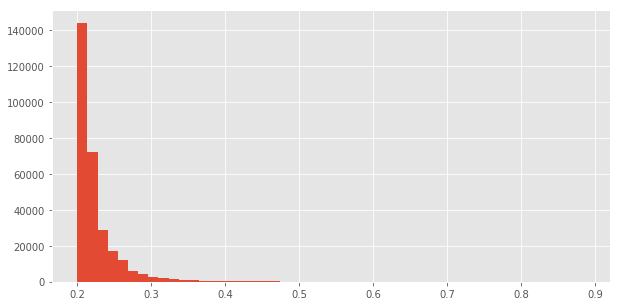

In [52]:
fig = plt.figure(figsize=(10,5))
all_rules['support'].hist(bins = 50)
plt.show()

It seems that most of the rules have a 0.2 support and too few have a support value bigger than 0.5, meaning less that 50% frequency among data observations.

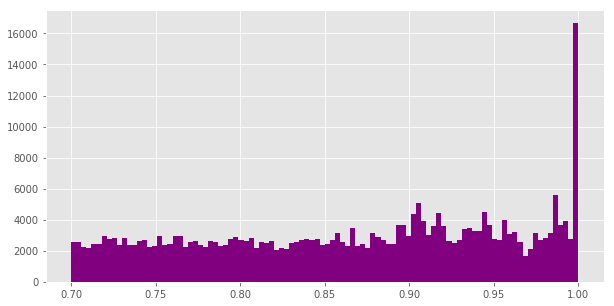

In [57]:
fig = plt.figure(figsize=(10,5))
all_rules['confidence'].hist(bins = 100, color='purple')
plt.show()

The confidence seems to be distributed random uniform except from 1 value confidence, in respect to what we notice a bigger number of association rules detected.

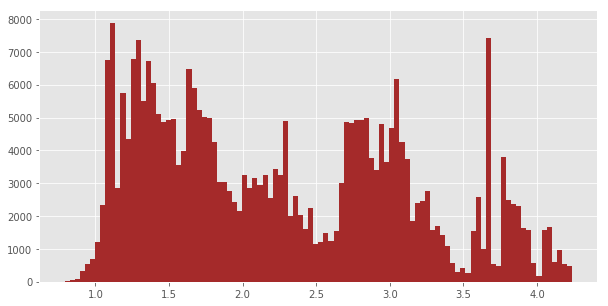

In [56]:
fig = plt.figure(figsize=(10,5))
all_rules['lift'].hist(bins = 100, color='brown')
plt.show()

## Filtering association rules by metrics threshholds

In [27]:
rules_lift_filtered = association_rules(frequent_itemsets, metric="lift", min_threshold=2.0)
rules_lift_filtered.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
228495,"(LandValue_\in 0 & 42539, BasementFinishedSqft_\in 0 & 726)","(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandSqft_\in 3999 & 10137, LivingSqft_\in 99 & 1656, Longitude_\in -80.379 & -80.076, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4)",0.344488,0.208408,0.204515,0.593678,2.848639,0.132721,1.948192
228496,(Longitude_\in -80.379 & -80.076),"(GarageSqft_\in 0 & 474, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)",0.430619,0.207017,0.204515,0.474933,2.294168,0.115369,1.510250
228497,(ImprovementValue_\in 17 & 153249),"(GarageSqft_\in 0 & 474, Longitude_\in -80.379 & -80.076, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)",0.358632,0.212031,0.204515,0.570264,2.689527,0.128474,1.833611
228498,(TotalValue_\in 1000 & 186330),"(GarageSqft_\in 0 & 474, Longitude_\in -80.379 & -80.076, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, LandValue_\in 0 & 42539, LivingSqft_\in 99 & 1656, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)",0.272663,0.205179,0.204515,0.750066,3.655669,0.148570,3.180122
228499,(LandValue_\in 0 & 42539),"(GarageSqft_\in 0 & 474, Longitude_\in -80.379 & -80.076, ImprovementValue_\in 17 & 153249, PropTaxAmount_\in 0.0 & 4494.0, TotalValue_\in 1000 & 186330, LivingSqft_\in 99 & 1656, LandSqft_\in 3999 & 10137, BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4, BasementFinishedSqft_\in 0 & 726)",0.344515,0.208408,0.204515,0.593632,2.848417,0.132716,1.947969


In [28]:
rules_support_filtered = association_rules(frequent_itemsets, metric="support", min_threshold=0.7)
rules_support_filtered.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(BasementSqft_\in 0 & 1074, BasementFinishedSqft_\in 0 & 726)",(Bedrooms_\in 0 & 4),0.886109,0.775143,0.729176,0.822896,1.061605,0.042314,1.269633
22,"(BasementFinishedSqft_\in 0 & 726, Bedrooms_\in 0 & 4)",(BasementSqft_\in 0 & 1074),0.746782,0.897536,0.729176,0.976424,1.087893,0.058912,4.346022
23,(BasementSqft_\in 0 & 1074),"(BasementFinishedSqft_\in 0 & 726, Bedrooms_\in 0 & 4)",0.897536,0.746782,0.729176,0.812419,1.087893,0.058912,1.349914
24,(Bedrooms_\in 0 & 4),"(BasementSqft_\in 0 & 1074, BasementFinishedSqft_\in 0 & 726)",0.775143,0.886109,0.729176,0.940699,1.061605,0.042314,1.920539
25,(BasementFinishedSqft_\in 0 & 726),"(BasementSqft_\in 0 & 1074, Bedrooms_\in 0 & 4)",0.916766,0.734208,0.729176,0.795378,1.083315,0.056079,1.298946


In [29]:
def print_info_about_rule(row):
    print("Rule: " + str(row['antecedents']) + " -> " + str(row['consequents']))

    #second index of the inner list
    print("Support: " + str(row['support']))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(row['confidence']))
    print("Lift: " + str(row['lift']))
    print("=====================================\n\n")

In [30]:
for (index, row) in all_rules.iterrows():
    for conseq in row['consequents']:
        if conseq.startswith('LandValue') and row['confidence'] > 0.9816:
            print_info_about_rule(row)

Rule: frozenset({'Longitude_\\in -80.379 & -80.076', 'TotalValue_\\in 1000 & 186330', 'LivingSqft_\\in 99 & 1656', 'LandSqft_\\in 3999 & 10137'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.2139775591292727
Confidence: 0.9817695473251029
Lift: 2.8497157621493243


Rule: frozenset({'GarageSqft_\\in 0 & 474', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.2139775591292727
Confidence: 0.9817695473251029
Lift: 2.8497157621493243


Rule: frozenset({'Longitude_\\in -80.379 & -80.076', 'TotalValue_\\in 1000 & 186330', 'LivingSqft_\\in 99 & 1656', 'LandSqft_\\in 3999 & 10137'}) -> frozenset({'LandValue_\\in 0 & 42539', 'GarageSqft_\\in 0 & 474'})
Support: 0.2139775591292727
Confidence: 0.9817695473251029
Lift: 2.8500125534386362


Rule: frozenset({'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\

Rule: frozenset({'PropTaxAmount_\\in 0.0 & 4494.0', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076', 'BasementSqft_\\in 0 & 1074'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.21366363807593303
Confidence: 0.9818241767300004
Lift: 2.849874331211318


Rule: frozenset({'PropTaxAmount_\\in 0.0 & 4494.0', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076'}) -> frozenset({'LandValue_\\in 0 & 42539', 'BasementSqft_\\in 0 & 1074'})
Support: 0.21366363807593303
Confidence: 0.9818241767300004
Lift: 2.8500969312684323


Rule: frozenset({'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076', 'Bedrooms_\\in 0 & 4', 'BasementFinishedSqft_\\in 0 & 726'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.2123451696519064
Confidence: 0.9819169673592966
Lift: 2.850

Rule: frozenset({'GarageSqft_\\in 0 & 474', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'BasementFinishedSqft_\\in 0 & 726', 'Longitude_\\in -80.379 & -80.076', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.2123451696519064
Confidence: 0.9819169673592966
Lift: 2.850143668266644


Rule: frozenset({'GarageSqft_\\in 0 & 474', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539', 'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.2123451696519064
Confidence: 0.9819169673592966
Lift: 2.8503662893613324


Rule: frozenset({'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'BasementFinishedSqft_\\in 0 & 726', 'Longitude_\\in -80.379 & -80.076', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539', 'GarageSqft_\\in 0 & 474'})
S

Rule: frozenset({'GarageSqft_\\in 0 & 474', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'BasementFinishedSqft_\\in 0 & 726', 'Longitude_\\in -80.379 & -80.076', 'BasementSqft_\\in 0 & 1074', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.2123451696519064
Confidence: 0.9819169673592966
Lift: 2.850143668266644


Rule: frozenset({'GarageSqft_\\in 0 & 474', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076', 'BasementSqft_\\in 0 & 1074', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539', 'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.2123451696519064
Confidence: 0.9819169673592966
Lift: 2.8503662893613324


Rule: frozenset({'GarageSqft_\\in 0 & 474', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'BasementFinishedSqft_\\in 0 & 726', 'Longitude_\\in -80.379 & -80.076', 'Bedroom

Rule: frozenset({'GarageSqft_\\in 0 & 474', 'PropTaxAmount_\\in 0.0 & 4494.0', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'BasementFinishedSqft_\\in 0 & 726', 'Longitude_\\in -80.379 & -80.076', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539'})
Support: 0.21203124859856673
Confidence: 0.9819722522223145
Lift: 2.850304139882391


Rule: frozenset({'GarageSqft_\\in 0 & 474', 'PropTaxAmount_\\in 0.0 & 4494.0', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'Longitude_\\in -80.379 & -80.076', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'LandValue_\\in 0 & 42539', 'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.21203124859856673
Confidence: 0.9819722522223145
Lift: 2.850526773511313


Rule: frozenset({'PropTaxAmount_\\in 0.0 & 4494.0', 'TotalValue_\\in 1000 & 186330', 'LandSqft_\\in 3999 & 10137', 'LivingSqft_\\in 99 & 1656', 'BasementFinishedSqft_\\in 0 & 726', 'Longitude_\\in -80.379 &

## Extracting useful association rules for a future prediction of the target features

In [31]:
for (index, row) in all_rules.iterrows():
    for conseq in row['consequents']:
        if conseq.startswith('SellPrice') and row['confidence'] > 0.76846:
            print_info_about_rule(row)

Rule: frozenset({'TotalValue_\\in 1000 & 186330', 'BasementSqft_\\in 0 & 1074', 'ImprovementValue_\\in 17 & 153249', 'GarageSqft_\\in 0 & 474'}) -> frozenset({'SellPrice_\\in 100.0 & 178400.0'})
Support: 0.2003175087225207
Confidence: 0.7684949418484618
Lift: 1.7847773564586529


Rule: frozenset({'TotalValue_\\in 1000 & 186330', 'ImprovementValue_\\in 17 & 153249', 'GarageSqft_\\in 0 & 474', 'BasementFinishedSqft_\\in 0 & 726'}) -> frozenset({'SellPrice_\\in 100.0 & 178400.0'})
Support: 0.2003444162413784
Confidence: 0.7684659579591978
Lift: 1.78471004334253


Rule: frozenset({'TotalValue_\\in 1000 & 186330', 'ImprovementValue_\\in 17 & 153249', 'GarageSqft_\\in 0 & 474', 'PropTaxAmount_\\in 0.0 & 4494.0'}) -> frozenset({'SellPrice_\\in 100.0 & 178400.0'})
Support: 0.20028163203071045
Confidence: 0.7685159691629956
Lift: 1.7848261909698557


Rule: frozenset({'GarageSqft_\\in 0 & 474', 'ImprovementValue_\\in 17 & 153249', 'TotalValue_\\in 1000 & 186330', 'BasementSqft_\\in 0 & 1074', 'B

For example, the first association rule can be intepreted like this: given a property with the following characteristics:
-  **'TotalValue** extimated between 1000 \$ and\ 186330 \$
-  **'Basements dimension** between 0 and 1074 sqft
-  **'ImprovementValue** extimeted between 17\$\ and\ 153249\$
-  **'Dimension of the garage'** between 0 and 474 sqft \
Is likely to have a **'SellPrice'** between 100.0\$\ and\ 178400.0\$. Analogically for **is_RCON** feature.

In [32]:
for (index, row) in all_rules.iterrows():
    for conseq in row['consequents']:
        if conseq.startswith('isRCON'):
            print_info_about_rule(row)
    for antec in row['antecedents']:
         if antec.startswith('isRCON') and row['confidence']>0.9998:
            print_info_about_rule(row)

Rule: frozenset({'isRCON_1', 'PropTaxAmount_\\in 0.0 & 4494.0'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.2322926102984044
Confidence: 0.9998069796170476
Lift: 1.0905802547468864


Rule: frozenset({'BasementSqft_\\in 0 & 1074', 'LivingSqft_\\in 99 & 1656', 'isRCON_1'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.2469392697299382
Confidence: 0.9998547356188263
Lift: 1.0906323465542525


Rule: frozenset({'isRCON_1', 'GarageSqft_\\in 0 & 474', 'PropTaxAmount_\\in 0.0 & 4494.0'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.23163786067286735
Confidence: 0.9998064341295342
Lift: 1.0905796597341253


Rule: frozenset({'BasementSqft_\\in 0 & 1074', 'isRCON_1', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.26548751939583654
Confidence: 0.9998648831239023
Lift: 1.0906434153594282


Rule: frozenset({'BasementSqft_\\in 0 & 1074', 'Quality_QAV', 'isRCON_1'}) -> frozenset({'BasementFinishedSqft_\\in 0

Rule: frozenset({'isRCON_1', 'GarageSqft_\\in 0 & 474', 'BasementSqft_\\in 0 & 1074', 'Quality_QAV', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.21589696214112097
Confidence: 1.0
Lift: 1.090790799604747


Rule: frozenset({'isRCON_1', 'GarageSqft_\\in 0 & 474', 'PropTaxAmount_\\in 0.0 & 4494.0', 'BasementSqft_\\in 0 & 1074', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.2301848546545523
Confidence: 0.999961036430937
Lift: 1.0907482985020933


Rule: frozenset({'SellDate_Year_\\in 1999 & 2017', 'isRCON_1', 'GarageSqft_\\in 0 & 474', 'BasementSqft_\\in 0 & 1074', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'BasementFinishedSqft_\\in 0 & 726'})
Support: 0.2181571937251666
Confidence: 0.9998355736424548
Lift: 1.0906114448467241


Rule: frozenset({'isRCON_1', 'GarageSqft_\\in 0 & 474', 'LivingSqft_\\in 99 & 1656', 'BasementSqft_\\in 0 & 1074', 'Quality_QAV', 'Bedrooms_\\in 0 & 4'}) -> frozenset({'BasementFinishedSqf

## Overview on the entire set of association rules

In [79]:
support = all_rules.as_matrix(columns=['support'])
confidence = all_rules.as_matrix(columns=['confidence'])

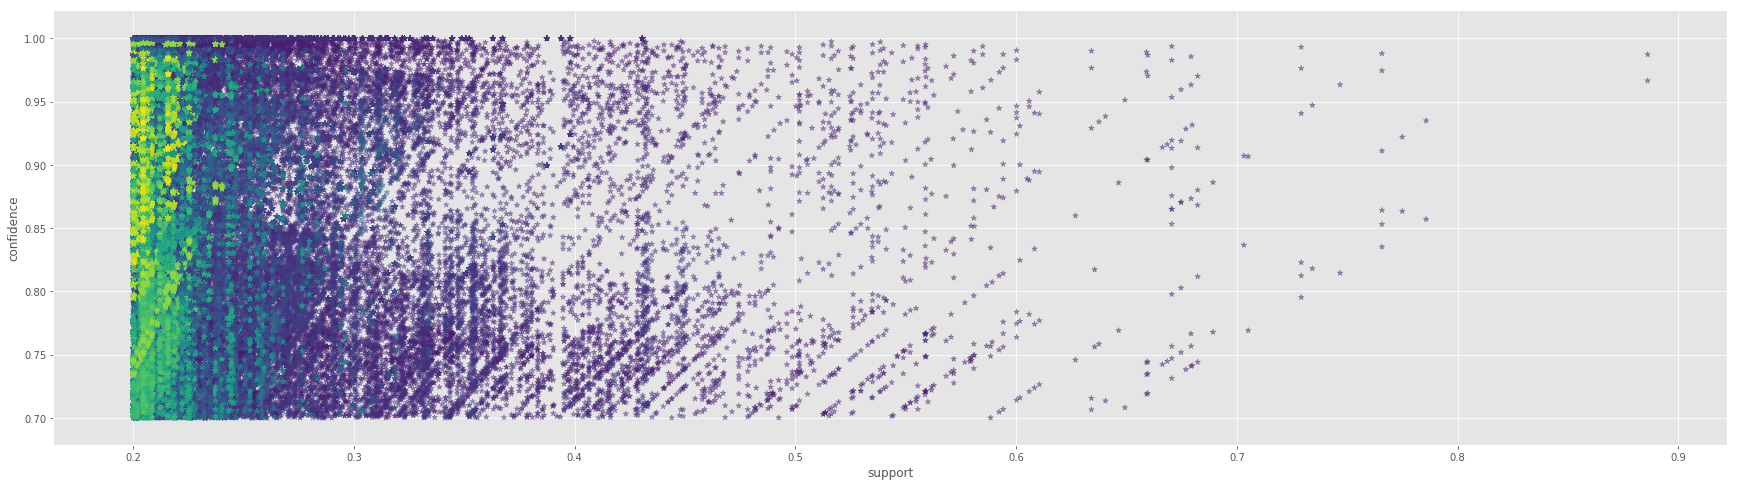

In [84]:
import random
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,8))
plt.scatter(support, confidence, alpha=0.5, marker="*", c=all_rules.as_matrix(columns=['lift']))
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## Conclusions

Association rules can constitute an important **mechanism for identifying patterns in data**, patterns which when taking about big data analysis are hard to be observed. These patterns can consist afterwards an important instrument for the customization of a Machine Learning model, capable of solving a regression or a classification problem.